# **Overview**
Traumatic injury is the most common cause of death in the first four decades of life and a major public health problem around the world. There are estimated to be more than 5 million annual deaths worldwide from traumatic injury. Prompt and accurate diagnosis of traumatic injuries is crucial for initiating appropriate and timely interventions, which can significantly improve patient outcomes and survival rates. Computed tomography (CT) has become an indispensable tool in evaluating patients with suspected abdominal injuries due to its ability to provide detailed cross-sectional images of the abdomen.

Interpreting CT scans for abdominal trauma, however, can be a complex and time-consuming task, especially when multiple injuries or areas of subtle active bleeding are present. This challenge seeks to harness the power of artificial intelligence and machine learning to assist medical professionals in rapidly and precisely detecting injuries and grading their severity. The development of advanced algorithms for this purpose has the potential to improve trauma care and patient outcomes worldwide.

This notebook is particularly going to be one of those notebooks in which the mine expertise of the domain knowledge is very less. But this challenge got me intimidating to try for what insights I can pull out of it.  

Cheers !! Let's dive in !

# So What exactly is Abdominal Trauma?
Abdominal trauma is an injury to the abdomen. Signs and symptoms include abdominal pain, tenderness, rigidity, and bruising of the external abdomen. Complications may include blood loss and infection.

Diagnosis may involve ultrasonography, computed tomography, and peritoneal lavage, and treatment may involve surgery. It is divided into two types blunt or penetrating and may involve damage to the abdominal organs. Injury to the lower chest may cause splenic or liver injuries.

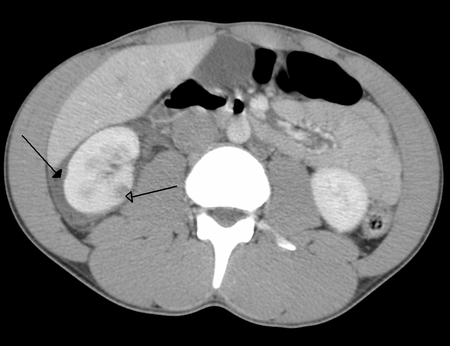
<br>Abdominal trauma resulting in a right kidney contusion (open arrow) and blood surrounding the kidney (closed arrow) as seen on CT.

## Signs and Symptoms
Abdominal trauma refers to injuries or damage to the structures within the abdominal cavity, which includes organs such as the liver, spleen, kidneys, intestines, and more. Signs and symptoms of abdominal trauma can vary depending on the severity and location of the injury. If you suspect someone has sustained abdominal trauma, it's important to seek medical attention immediately. Here are some common signs and symptoms to watch out for:

1. **Pain:** Abdominal pain can range from mild discomfort to severe and intense pain. The location and nature of the pain can provide clues to the specific injured area.

2. **Tenderness:** The injured person may experience tenderness when pressure is applied to the abdomen. This tenderness may be localized to a specific area.

3. **Bruising:** Visible bruising on the abdomen or around the sides (flanks) could indicate trauma to the underlying structures.

4. **Swelling:** Swelling or distension of the abdomen can occur due to internal bleeding or other injuries.

5. **Nausea and vomiting:** These symptoms can be a result of the body's response to trauma and pain.

6. **Difficulty breathing:** In some cases, abdominal trauma can cause pain and pressure on the diaphragm, making breathing difficult.

7. **Rigid abdomen:** If the abdominal muscles become tense and rigid, it could be a sign of internal bleeding or a serious injury.

8. **Changes in bowel movements:** Abdominal trauma might lead to changes in bowel movements, including constipation or diarrhea.

9. **Blood in urine or stool:** Blood in urine (hematuria) or stool (melena) can indicate damage to the urinary or digestive systems.

10. **Shock:** Severe abdominal trauma can lead to shock, characterized by low blood pressure, rapid heartbeat, and cold, clammy skin.

11. **Dizziness and lightheadedness:** Blood loss from internal injuries can lead to a drop in blood pressure, causing these symptoms.

12. **Fever:** An elevated body temperature could be a sign of infection, which might occur as a complication of abdominal trauma.

Remember that some symptoms might not be immediately apparent, especially in cases of internal bleeding. If you suspect someone has sustained abdominal trauma, it's crucial to seek immediate medical attention. Do not attempt to diagnose or treat abdominal trauma yourself, as it requires professional evaluation and medical intervention.

## Major Causes:
Abdominal trauma refers to injuries sustained to the structures within the abdominal cavity. These injuries can be caused by various factors, ranging from accidents to medical conditions. Here are some common causes of abdominal trauma:

1. **Blunt Force Trauma:** This occurs when a blunt object strikes the abdomen, causing injury without penetrating the skin. Common causes include:

   - Motor vehicle accidents
   - Falls from a height
   - Physical assaults or altercations
   - Sports-related injuries

2. **Penetrating Trauma:** Penetrating trauma involves an object breaking through the skin and entering the abdominal cavity. Causes include:

   - Stab wounds from knives or other sharp objects
   - Gunshot wounds

3. **Sports Injuries:** Certain sports, especially contact sports, can lead to abdominal trauma due to collisions or direct impact.

4. **Industrial Accidents:** Accidents in industrial settings, such as machinery malfunctions or falling objects, can result in abdominal injuries.

5. **Domestic Accidents:** Accidents at home, such as falling down stairs or tripping, can also cause abdominal trauma.

6. **Workplace Injuries:** Jobs that involve heavy lifting, machinery operation, or physical labor can increase the risk of abdominal trauma.

7. **Child Abuse:** Non-accidental trauma, such as child abuse or shaken baby syndrome, can lead to abdominal injuries in children.

8. **Motorcycle or Bicycle Accidents:** Accidents involving motorcycles or bicycles can cause abdominal trauma due to the lack of protective barriers.

9. **Explosions and Blasts:** Explosive events, such as bombings or industrial explosions, can cause severe abdominal injuries due to the force of the blast and flying debris.

10. **Sports Equipment Impact:** In contact sports like football, hockey, or martial arts, direct impact from sports equipment or opponents can cause abdominal trauma.

11. **Medical Procedures:** Invasive medical procedures or surgeries in the abdominal area can lead to trauma, although these are typically controlled environments.

12. **Abdominal Organ Rupture:** The rupture of internal organs like the spleen, liver, or kidney due to trauma or underlying conditions can cause significant abdominal trauma.

13. **Seatbelt Injuries:** In car accidents, seatbelts can sometimes cause abdominal injuries due to the force exerted on the abdomen during a collision.

It's important to note that abdominal trauma can range from mild to severe and life-threatening. Any suspected abdominal trauma should be evaluated by medical professionals promptly to determine the extent of the injury and provide appropriate treatment.


<br><br><br>
**Now, Let's get started with our notebook !!**

# Importing Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pydicom
from pydicom.data import get_testdata_files
import plotly.express as px
from pprint import pprint
import nibabel as nib
from ipywidgets import interact

Checking all the data components/files we have in our data.

In [6]:
main_folder = "/kaggle/input/rsna-2023-abdominal-trauma-detection/"
!ls {main_folder}

image_level_labels.csv	 test_images		   train_images
sample_submission.csv	 test_series_meta.csv	   train_series_meta.csv
segmentations		 train.csv
test_dicom_tags.parquet  train_dicom_tags.parquet


# Reading "train.csv" file

In [7]:
train = pd.read_csv(main_folder + "train.csv")
train.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [8]:
print("Number of rows and columns:", train.shape) 
print()
print('*************************************')
print()
print(train.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",train.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",train.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",train.isnull().sum())

Number of rows and columns: (3147, 15)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   patient_id             3147 non-null   int64
 1   bowel_healthy          3147 non-null   int64
 2   bowel_injury           3147 non-null   int64
 3   extravasation_healthy  3147 non-null   int64
 4   extravasation_injury   3147 non-null   int64
 5   kidney_healthy         3147 non-null   int64
 6   kidney_low             3147 non-null   int64
 7   kidney_high            3147 non-null   int64
 8   liver_healthy          3147 non-null   int64
 9   liver_low              3147 non-null   int64
 10  liver_high             3147 non-null   int64
 11  spleen_healthy         3147 non-null   int64
 12  spleen_low             3147 non-null   int64
 13  spleen_high            3147 non-null   int64
 14  any_injur

- There are total 3147 rows and 15 columns.
- It seems data is well structed like a one-hot encoding is already done on the columns as a particular column categorized into several columns and there are no null values.
- Also each column just contains binary values (0 or 1).

# Reading "train_series_meta.csv" file

In [9]:
train_series_meta = pd.read_csv(main_folder + "train_series_meta.csv")
train_series_meta.head()

,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0


In [10]:
print("Number of rows and columns:", train_series_meta.shape) 
print()
print('*************************************')
print()
print(train_series_meta.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",train_series_meta.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",train_series_meta.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",train_series_meta.isnull().sum())

Number of rows and columns: (4711, 4)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        4711 non-null   int64  
 1   series_id         4711 non-null   int64  
 2   aortic_hu         4711 non-null   float64
 3   incomplete_organ  4711 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 147.3 KB
None

*************************************

Number of Unique Values:
 patient_id          3147
series_id           4711
aortic_hu            717
incomplete_organ       2
dtype: int64

*************************************

Duplicate Values:
 0

*************************************

Null Values:
 patient_id          0
series_id           0
aortic_hu           0
incomplete_organ    0
dtype: int64


- There are total 4711 rows and 4 columns.
- Here the only column with all unique values in series_id with all different values.
- We have repetiting patient IDs too, so can say particular patient having multiple data entries.

# Feature Engineering
- Though the data already seeme usable the way it is, but let's still have some fun with columns.
- As I already mentioned before, that column seems one-hot encoded already so we'll just try to reverse it by merging all in a compact way.

In [11]:
train['bowel'] = (train.iloc[:, 1:3] == 1).idxmax(1)
train['extravasation'] = (train.iloc[:, 3:5] == 1).idxmax(1)
train['kidney'] = (train.iloc[:, 5:8] == 1).idxmax(1)
train['liver'] = (train.iloc[:, 8:11] == 1).idxmax(1)
train['spleen'] = (train.iloc[:, 11:14] == 1).idxmax(1)

train.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,bowel_healthy,extravasation_injury,kidney_low,liver_healthy,spleen_high
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_low


Hmmm !! seems like our work is done now almost. Now let's delete the old used columns.

In [12]:
train = train.drop(columns =['bowel_healthy','bowel_injury','extravasation_healthy','extravasation_injury','kidney_healthy','kidney_low','kidney_high','liver_healthy','liver_low','liver_high',
                             'spleen_healthy','spleen_low','spleen_high'])
train.head()

,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,bowel_healthy,extravasation_injury,kidney_low,liver_healthy,spleen_high
1,10005,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
2,10007,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
3,10026,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
4,10051,1,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_low


- But wait !! now we are able to understand this categorical data too easy but how will the computer understand it now ?? Huh !
- For that now let's change these categorical values into numerical values by mapping.
<br><br>
- Seems like we took a long route to explore this. But trying some new ways is a way to explore too,<br>
So, now let's move forward !!

In [13]:
train['bowel'] = train['bowel'].replace(['bowel_injury','bowel_healthy'], [0, 1])
train['extravasation'] = train['extravasation'].replace(['extravasation_injury', 'extravasation_healthy'], [0, 1])
train['kidney'] = train['kidney'].replace(['kidney_low','kidney_high','kidney_healthy'], [0, 1, 2])
train['liver'] = train['liver'].replace(['liver_low','liver_high','liver_healthy'], [0, 1, 2])
train['spleen'] = train['spleen'].replace(['spleen_low','spleen_high','spleen_healthy'], [0, 1, 2])

train.head()

,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,1,0,0,2,1
1,10005,0,1,1,2,2,2
2,10007,0,1,1,2,2,2
3,10026,0,1,1,2,2,2
4,10051,1,1,1,2,2,0


# Reading "image_level_labels.csv" file

In [14]:
image_labels = pd.read_csv(main_folder + "image_level_labels.csv")
image_labels.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [15]:
print("Number of rows and columns:", image_labels.shape) 
print()
print('*************************************')
print()
print(image_labels.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",image_labels.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",image_labels.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",image_labels.isnull().sum())

Number of rows and columns: (12029, 4)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       12029 non-null  int64 
 1   series_id        12029 non-null  int64 
 2   instance_number  12029 non-null  int64 
 3   injury_name      12029 non-null  object
dtypes: int64(3), object(1)
memory usage: 376.0+ KB
None

*************************************

Number of Unique Values:
 patient_id         246
series_id          330
instance_number    925
injury_name          2
dtype: int64

*************************************

Duplicate Values:
 0

*************************************

Null Values:
 patient_id         0
series_id          0
instance_number    0
injury_name        0
dtype: int64


- Here it seems we don't have all unique values for any column.
- It clearly seems that a particular patient must be having too many multiple records.
- There are no null values though.

# Reading "train_dicom_tags.parquet" file

In [16]:
train_dicom_tags = pd.read_parquet(main_folder + "train_dicom_tags.parquet")
train_dicom_tags.head()

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,...,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path,RescaleType
0,16,16,512,20230722,003306.881589,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1459.20]",532,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.532,1.2.840.10008.1.2.5,train_images/49954/41479/532.dcm,nan
1,16,16,512,20230722,003303.279137,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1474.40]",513,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.513,1.2.840.10008.1.2.5,train_images/49954/41479/513.dcm,nan
2,16,16,512,20230722,003343.090736,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1310.40]",718,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.718,1.2.840.10008.1.2.5,train_images/49954/41479/718.dcm,nan
3,16,16,512,20230722,003252.960345,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1520.00]",456,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.456,1.2.840.10008.1.2.5,train_images/49954/41479/456.dcm,nan
4,16,16,512,20230722,003155.059398,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1756.00]",161,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.161,1.2.840.10008.1.2.5,train_images/49954/41479/161.dcm,nan


In [17]:
print("Number of rows and columns:", train_dicom_tags.shape) 
print()
print('*************************************')
print()
print(train_dicom_tags.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",train_dicom_tags.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",train_dicom_tags.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",train_dicom_tags.isnull().sum())

Number of rows and columns: (1510373, 35)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510373 entries, 0 to 1510372
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BitsAllocated               1510373 non-null  int64  
 1   BitsStored                  1510373 non-null  int64  
 2   Columns                     1510373 non-null  int64  
 3   ContentDate                 1510373 non-null  object 
 4   ContentTime                 1510373 non-null  object 
 5   FrameOfReferenceUID         1510373 non-null  object 
 6   HighBit                     1510373 non-null  int64  
 7   ImageOrientationPatient     1510373 non-null  object 
 8   ImagePositionPatient        1510373 non-null  object 
 9   InstanceNumber              1510373 non-null  int64  
 10  KVP                         1510373 non-null  float64
 11  PatientID                   15103

# Data Visualization

## Checking the distribution of patients having any injury

In [18]:
fig = px.pie(train, names=train['any_injury'].map({1: 'Patient Injured', 0: 'No Injury'}), height=500, width= 500, color_discrete_sequence=['#D3D3D3','#71797E'], title='Injuries reported in patients')
fig.update_traces(textfont_size=15)
fig.show()

### Checking (Bowel, Extravasation) organs Health in patients

In [19]:
for column in train.columns[2:4]:
    fig = px.pie(train, names=train[column].map({1: 'Healthy', 0: 'Injury'}), height=450, width= 450, color_discrete_sequence=['#E5E4E2','#71797E', '#D3D3D3'], 
             title=f' Pie-Chart of {column}')
    fig.update_traces(textfont_size=15)
    fig.show()

### Checking (Kidney, Liver, Spleen) Organs Health in patients

In [20]:
for column in train.columns[4:]:
    fig = px.pie(train, names=train[column].map({2: 'Healthy', 1: 'High Level Injury', 0: 'Low Level Injury'}), height=500, width= 500, color_discrete_sequence=['#E5E4E2','#71797E', '#D3D3D3'], 
             title=f' Pie-Chart of {column}')
    fig.update_traces(textfont_size=15)
    fig.show()

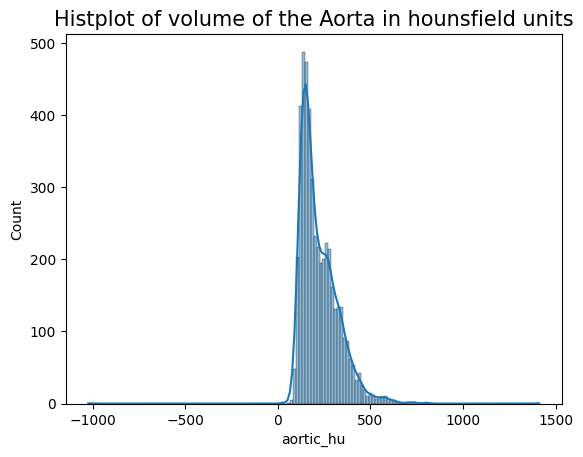

In [21]:
sns.histplot(train_series_meta['aortic_hu'],kde=True)
plt.title('Histplot of volume of the Aorta in hounsfield units',fontsize=15)
plt.show()

- If we closely observe we can see that there is a fine horizontal line ending at -1000, i.e. indicating a negative value which is not practically feasible.
- Lets check for such negative values.

In [22]:
train_series_meta[train_series_meta['aortic_hu']<0]

,patient_id,series_id,aortic_hu,incomplete_organ
1742,31284,58351,-1024.0,1


- It seems there was one record which was the main reason behind that. 
- So now, we will take its mod and proceed further

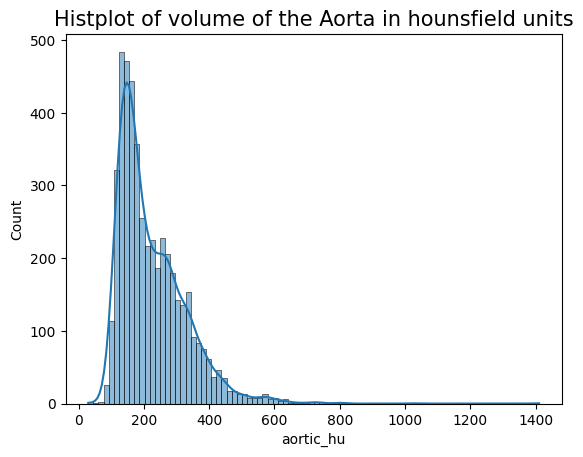

In [23]:
sns.histplot(np.abs(train_series_meta['aortic_hu']), kde=True)
plt.title('Histplot of volume of the Aorta in hounsfield units',fontsize=15)
plt.show()

## Checking whether organs scanned properly during scaning

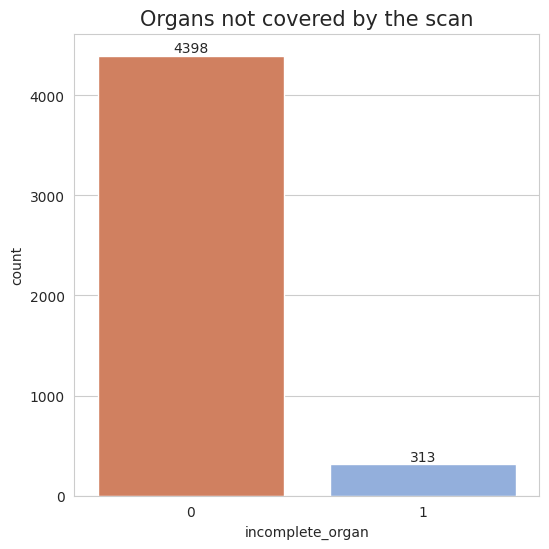

In [24]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='incomplete_organ',data=train_series_meta, palette=['#e3784d','#87ace8'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Organs not covered by the scan',fontsize=15)
plt.show()

fig = px.pie(train_series_meta, names=train_series_meta['incomplete_organ'].map({1: 'Organs covered by scan', 0: 'No organs covered by scan'}), height=550, width= 550,
             color_discrete_sequence=['#D3D3D3','#71797E'], title='Organs covered during scan')
fig.update_traces(textfont_size=15)
fig.show()

- Well, for like 4398 records (93.4%) incdicating organs were scanned properly. On the contrary, number is quite less.

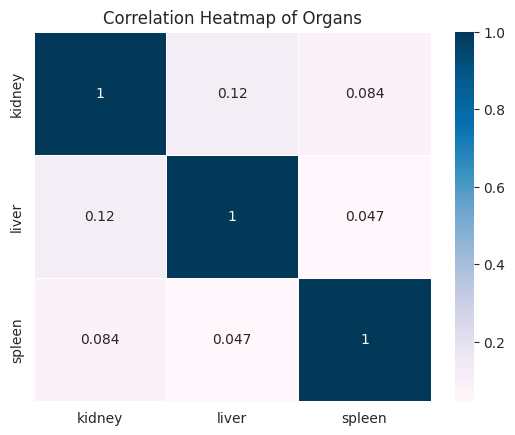

In [25]:
health_columns = ["kidney", "liver", "spleen"]

correlation_matrix = train[health_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="PuBu", linewidths=.5)
plt.title("Correlation Heatmap of Organs")
plt.show()

- There is no such big correlation among variables affecting overall analysis.

## Now checking Injuries shown in patients image labels

In [26]:
image_labels['injury_name'].unique()

array(['Active_Extravasation', 'Bowel'], dtype=object)

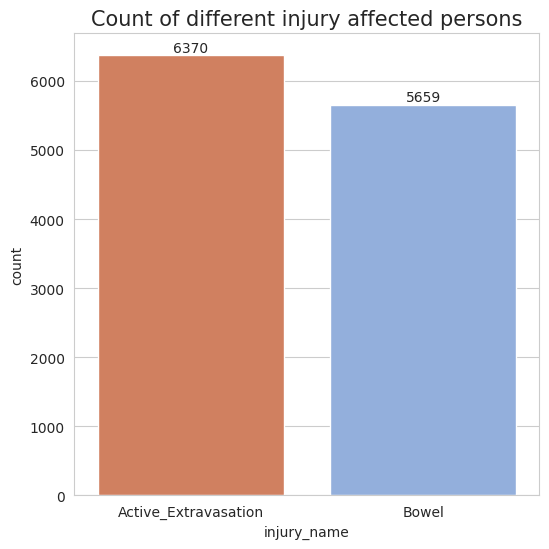

In [27]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='injury_name',data=image_labels, palette=['#e3784d','#87ace8'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of different injury affected persons',fontsize=15)
plt.show()

- There is not big difference between the  patients affected by both injuries, but can surely say Still extravasation cases are quite more active.

## Slice Thickness Distributions used for various CT-Scans

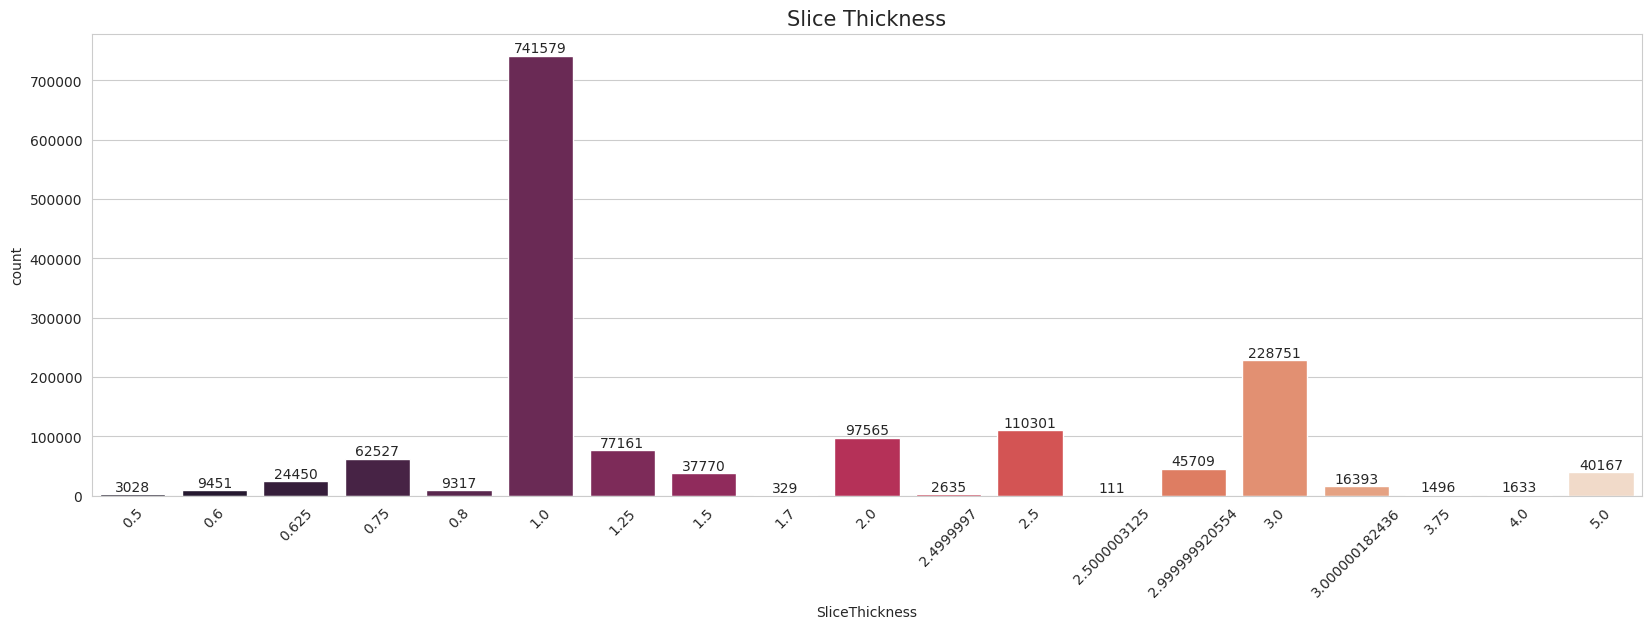

In [28]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(20,6))
ax = sns.countplot(x='SliceThickness',palette='rocket', data=train_dicom_tags)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Slice Thickness',fontsize=15)
plt.xticks(rotation=45)
plt.show()

# Reading ".dcm" files

In [29]:
sample_image = "/kaggle/input/rsna-2023-abdominal-trauma-detection/train_images/35794/42578/140.dcm"

In [30]:
def get_observation_data(path):
    '''
    Get information from the .dcm files
    '''
    dataset = pydicom.read_file(path)
    
    # Dictionary to store the information from the image
    observation_data = {
        "Rows" : dataset.get("Rows"),
        "Columns" : dataset.get("Columns"),
        "SOPInstanceUID" : dataset.get("SOPInstanceUID"),
        "ContentDate" : dataset.get("ContentDate"),
        "SliceThickness" : dataset.get("SliceThickness"),
        "InstanceNumber" : dataset.get("InstanceNumber"),
        "ImagePositionPatient" : dataset.get("ImagePositionPatient"),
        "ImageOrientationPatient" : dataset.get("ImageOrientationPatient"),
    }

    # String columns
    str_columns = ["SOPInstanceUID", "ContentDate", 
                   "SliceThickness", "InstanceNumber"]
    for k in str_columns:
        observation_data[k] = str(dataset.get(k)) if k in dataset else None

    
    return observation_data

## Getting more info about the sample dcm image

In [31]:
example = get_observation_data(sample_image)
pprint(example)

{'Columns': 512,
 'ContentDate': '20230722',
 'ImageOrientationPatient': [1, 0, 0, 0, 1, 0],
 'ImagePositionPatient': [-248.537109375, -412.537109375, 962.2],
 'InstanceNumber': '140',
 'Rows': 512,
 'SOPInstanceUID': '1.2.123.12345.1.2.3.35794.1.140',
 'SliceThickness': '3'}


# Previewing DCM Image

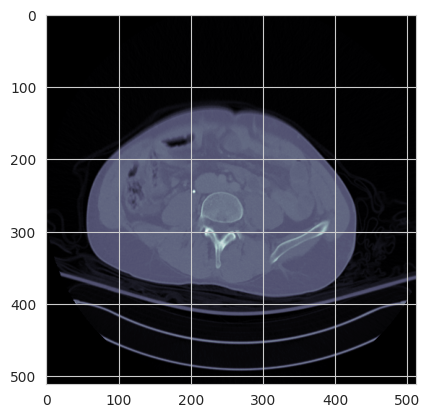

In [32]:
def plot_image(Image_path):
    ds = pydicom.dcmread(Image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()
    
plot_image(sample_image)

# Segmentations

In [33]:
sample_filename = "/kaggle/input/rsna-2023-abdominal-trauma-detection/segmentations/10252.nii"

sample_img = nib.load(sample_filename)
array = sample_img.get_fdata()
print("img shape ->", array.shape)

img shape -> (512, 512, 88)


In [34]:
print(sample_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 88)
affine:
[[  -0.75976598    0.            0.          189.65188599]
 [   0.            0.75976598    0.         -193.36053467]
 [   0.            0.            3.         -488.5       ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  88   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.759766  0.759766  3.        0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min      

# Calculateing the middle slice, and previewing along the Z-axis

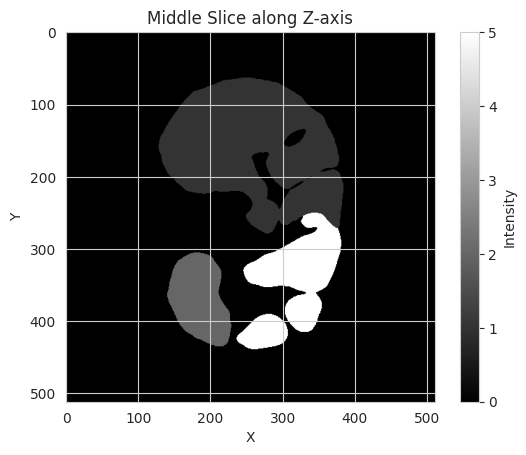

In [35]:
middle_slice = array[:,:,array.shape[2] // 2]

plt.imshow(middle_slice, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Middle Slice along Z-axis')
plt.colorbar(label='Intensity')
plt.show()

# Visualizing Images as a slider

In [36]:
def show_slice(i):
    plt.imshow(array[:,:,i], cmap='gray')
    plt.show()

interact(show_slice, i=(0, array.shape[2]-1))

interactive(children=(IntSlider(value=43, description='i', max=87), Output()), _dom_classes=('widget-interact'…

<function __main__.show_slice(i)>

# STAY TUNED !!
The notebook's work is in progress. As this one's competition is specifically going to be quite exploratory to me as I have no in-depth domain knowledge of competition specific medical field but as I am quite good at EDA so I'll give it all as a part of my learning. Also after spending quite a good amount of time in undertanding and implementing notebooks, let this be the competition I take my step forward in learning new techniques and ways by following along with the competition. I am learning a lot while covering all this and coming across many new libraries, keywords and some wonderful resources too. For sure I'll conclude all the references of my learnings in the coming updates and will keep on exploring more insights. 

### <p style="text-align:center;"><span style="color:red">💬 Thanks for reading till the end!! If you liked the notebook till here then please do Upvote👍. I am all ears to advice/remarks if you think anything needs to be added/modified.!!😃</span></p>